In [1]:
import os
import joblib
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
proc_path = '../data/processed'

# make scaler to go back to real scale
low_mu_data = pd.read_csv('../data/raw/low_mu_data18_tst_data.csv')
l_scaler = StandardScaler()
l_scaler.fit(low_mu_data.values)

# make scaler to go back to real scale
high_mu_data = pd.read_csv('../data/raw/high_mu_data18_tst_data.csv')
h_scaler = StandardScaler()
h_scaler.fit(high_mu_data.values)

StandardScaler()

In [4]:
m_file = joblib.load(os.path.join(proc_path, 'gen_samples_tst_low_mu.jbl'))
m_list = []
print('Total of samples: %i' %len(m_file))
for i in m_file:
    m_list.append(np.reshape(i, (104)))

# back to real scale
m_data = l_scaler.inverse_transform(np.array(m_list))
#m_data = np.array(m_list)
print(m_data.shape)
cols_ = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']

low_gen_df = pd.DataFrame(data=m_data, columns=cols_)
low_gen_df.head()

Total of samples: 216940
(216940, 104)


,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,31.263748,915.754028,570.544922,-238.635864,-210.807098,-215.270218,-203.013077,-196.474121,-184.469971,2035.586304,...,307.532684,476.812439,468.129120,4.257668,11.052112,107.915421,122.108810,0.975919,0.002898,1.008283
1,31.263748,915.754028,570.544922,354.985931,269.541229,268.587555,252.403305,241.129852,229.091827,2035.586304,...,294.699036,476.322021,468.115417,4.107833,-2.444355,107.170204,97.817398,0.976832,0.002147,1.005632
2,31.263748,915.754028,570.544922,-129.444504,-210.807098,-215.270523,-203.767487,-193.831223,228.846268,2035.586304,...,269.496094,476.812439,468.129120,4.382782,-72.681068,107.914146,109.268501,0.978190,0.003290,1.008820
3,31.263748,915.754028,570.544922,354.985931,269.541229,268.587555,252.403305,241.129852,229.091858,2035.586304,...,215.799194,475.882355,467.901794,-0.525627,-49.434696,105.942909,62.496414,0.977053,0.001031,1.007292
4,31.263748,915.754028,570.544922,301.602325,-210.151123,68.006111,252.383087,241.120789,229.091812,2035.586304,...,307.634064,476.812439,468.129120,0.849450,43.523403,107.909340,120.667809,0.975535,0.002499,1.006095


In [17]:
def plot_mean_profile(df, df2=None, dolog=False, save=False):
    calo_sampling_names = ['PS', 'EM1', 'EM2', 'EM3', 'HAD1', 'HAD2', 'HAD3']
    
    plt.figure(figsize=(15, 5))
    # check if there is another df
    if type(df2) != type(None):
        if df2.avgmu.min() > 40:
            high_ = df2
            low_  = df
            high_label = r'Synthetic Rings | High $ \langle \mu \rangle $'
            low_label = r'Synthetic Rings | Low $ \langle \mu \rangle $'
        else:
            high_ = df
            low_  = df2
            high_label = r'Synthetic Rings | High $ \langle \mu \rangle $'
            low_label = r'Synthetic Rings | Low $ \langle \mu \rangle $'
        mu_tag = 'High vs Low'    
        
        plt.title(r'Mean Synthetic Rings Profile | %s $ \langle \mu \rangle $' %(mu_tag), fontsize=15)

        # high_mu
        h_synt_mean = np.mean(high_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        h_synt_std  = np.std(high_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        # low_mu
        l_synt_mean = np.mean(low_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        l_synt_std  = np.std(low_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)

        # plot high and fill
        plt.plot(h_synt_mean, color='green', lw=2.5, label=high_label)
        plt.fill_between(range(100), h_synt_mean+h_synt_std, h_synt_mean-h_synt_std, facecolor='green', alpha=0.5)

        # plot low and fill
        plt.plot(l_synt_mean, color='blue', lw=2.5, label=low_label)
        plt.fill_between(range(100), l_synt_mean+l_synt_std, l_synt_mean-l_synt_std, facecolor='blue', alpha=0.5)

    else:
        if df.avgmu.min() > 40:
            ref_df    = high_mu_data
            mu_tag    = 'High'
            ref_label = 'Original Rings'
        else:
            ref_df = low_mu_data
            mu_tag = 'Low'
            ref_label = 'Original Rings'
        plt.title(r'Mean Synthetic Rings Profile | %s $ \langle \mu \rangle $' %(mu_tag), fontsize=15)

        # calculate means
        orig_mean = np.mean(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        orig_std  = np.std(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        synt_mean = np.mean(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)
        synt_std  = np.std(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)

        # plot original and fill
        plt.plot(orig_mean, color='green', lw=2.5, label=ref_label)
        plt.fill_between(range(100), orig_mean+orig_std, orig_mean-orig_std, facecolor='green', alpha=0.15)

        # plot synthetic and fill
        plt.plot(synt_mean, color='blue', lw=2.5, label=r'Synthetic Rings | %s $ \langle \mu \rangle $' %(mu_tag))
        plt.fill_between(range(100), synt_mean+synt_std, synt_mean-synt_std, facecolor='blue', alpha=0.15)

    plt.grid()
    if type(df2) != type(None):
        y_text_coord = np.maximum(np.max(np.mean(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)), 
                                  np.max(np.mean(df2[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)))
        print(y_text_coord)
    else:
        y_text_coord = np.maximum(np.max(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values),
                                  np.mean(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values))
    if dolog:
        plt.yscale('log')
    # create vertical lines and put the sampling names
    for samp, idx in zip(calo_sampling_names, [7, 71, 79, 87, 91, 95, 99]):
        plt.axvline(idx, ls='--', color='black', lw=1.5)
        plt.text(x=idx-2, y=0.7*y_text_coord, s=samp, rotation=90, fontsize=13)
    
    plt.legend(loc='best', fontsize=15)
    plt.ylabel('Energy [MeV]', fontsize=13)
    plt.xlabel('# Rings', fontsize=13)
    if save:
        if dolog:
            plot_name = 'log_rings_profile_%s.png' %(mu_tag.replace(' ', '_').lower())
        else:
            plot_name = 'rings_profile_%s.png' %(mu_tag.replace(' ', '_').lower())
        plt.savefig(os.path.join(proc_path, plot_name), dpi=300, facecolor='white')

3099.0194101623815


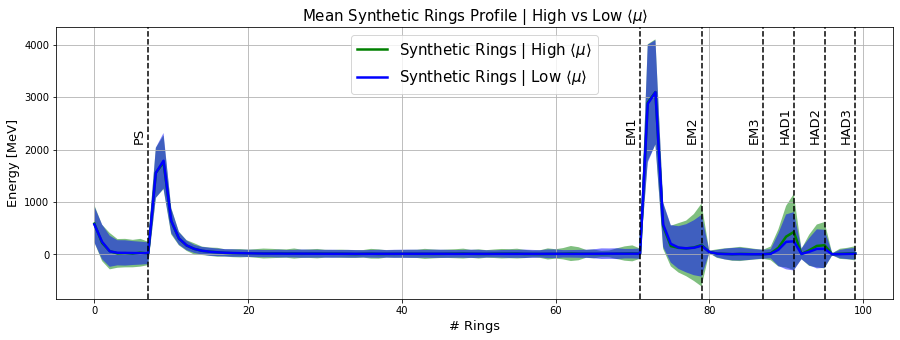

In [12]:
plot_mean_profile(low_mu_data, df2=high_mu_data)

3099.0194101623815


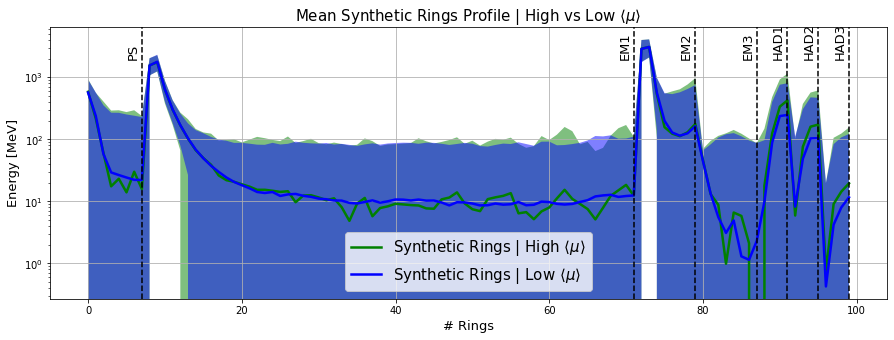

In [13]:
plot_mean_profile(low_mu_data, df2=high_mu_data, dolog=True)

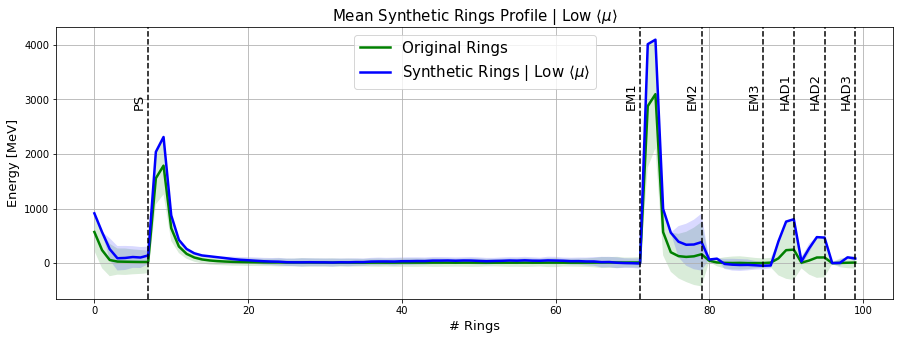

In [16]:
plot_mean_profile(low_gen_df, save=True)

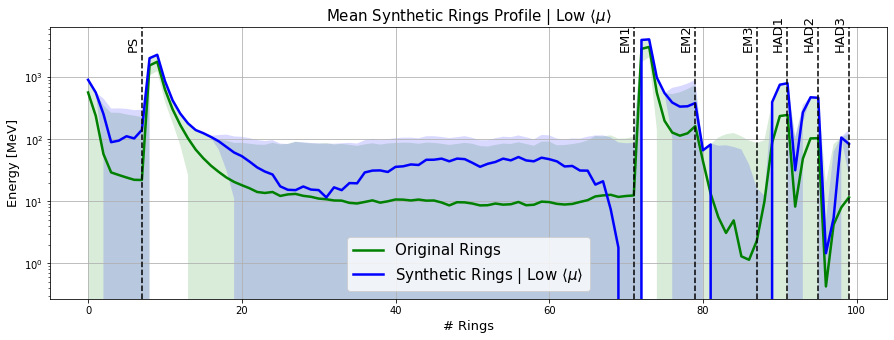

In [18]:
plot_mean_profile(low_gen_df, dolog=True, save=True)

In [19]:
decide_threshold = [-0.006501296841225447, #slope
                    -1.4896478184400082] #offset

# decision
# pass if output > avgmu*slope + offset.
    
# load mlp model and test on synthetic data

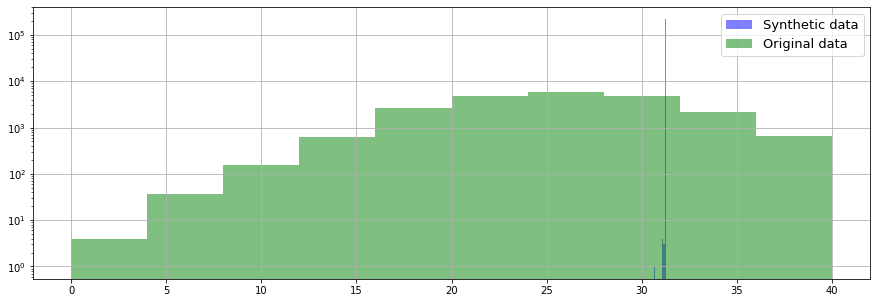

In [21]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.avgmu, color='blue', bins=10, lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.avgmu, color='green', bins=10, lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

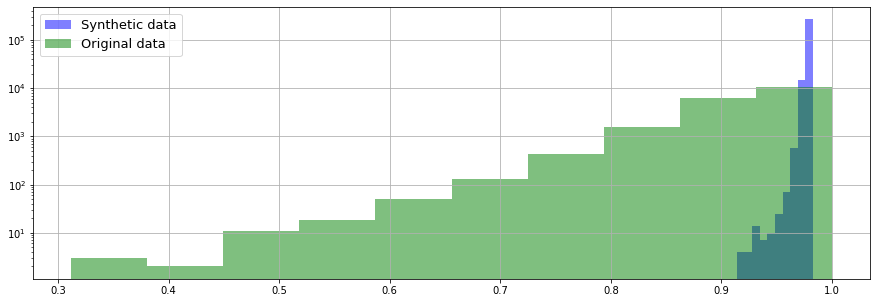

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.eratio, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.eratio, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

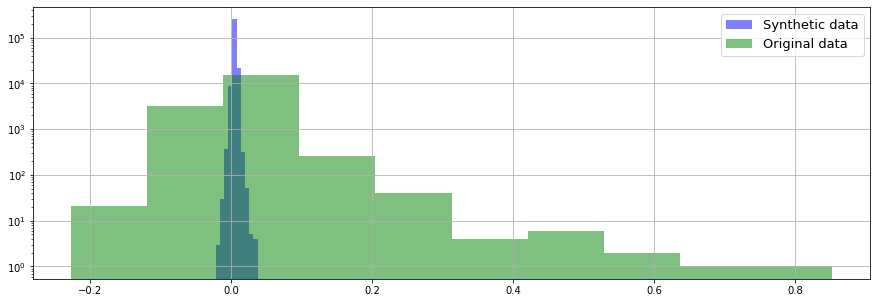

In [11]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.rhad, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.rhad, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

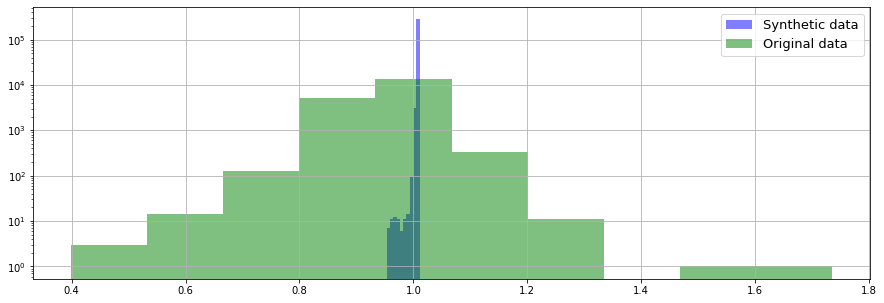

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.reta, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.reta, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

# High mu

In [13]:
m_file = joblib.load(os.path.join(proc_path, 'high_mu_lr_gen_samples.jbl'))
m_list = []
print('Total of samples: %i' %len(m_file))
for i in m_file:
    m_list.append(np.reshape(i, (104)))

# back to real scale
m_data = h_scaler.inverse_transform(np.array(m_list))
print(m_data.shape)
cols_ = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']

high_gen_df = pd.DataFrame(data=m_data, columns=cols_)
high_gen_df.head()

Total of samples: 13800
(13800, 104)


,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,43.379414,591.811462,173.729477,18.740088,15.089194,-17.920530,39.822468,-14.318860,13.529214,1466.181274,...,109.497894,104.359947,165.961823,-6.716992,14.377784,6.216253,43.439335,0.913160,0.011045,0.952554
1,43.303883,588.140137,167.082184,4.026105,48.489548,-15.403175,71.980034,-18.689016,43.635395,1498.230103,...,164.467438,63.167351,213.396240,-3.025028,19.962973,5.767665,78.336731,0.915221,0.014620,0.950378
2,43.452648,613.321411,199.709396,50.110744,52.591736,30.763237,92.633850,6.588714,43.760574,1605.260254,...,205.784149,106.204224,209.346237,7.395874,24.252449,28.541836,80.101257,0.923119,0.015544,0.954631
3,43.463459,620.807617,207.814148,62.106869,52.130318,36.243263,106.128586,4.270279,39.194710,1637.844727,...,220.856842,105.226028,187.109390,8.284623,31.292616,36.142502,79.130623,0.923983,0.016903,0.954476
4,43.476807,639.806396,212.858093,104.178238,57.298576,54.674618,110.766716,36.017925,40.559307,1690.485352,...,221.073929,165.760818,182.538422,13.340046,34.902283,53.111614,80.078209,0.927329,0.017083,0.957169


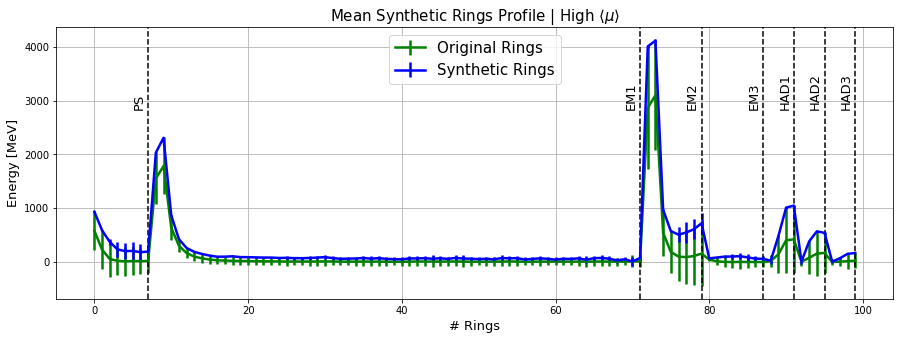

In [14]:
plot_mean_profile(high_gen_df)

4115.426


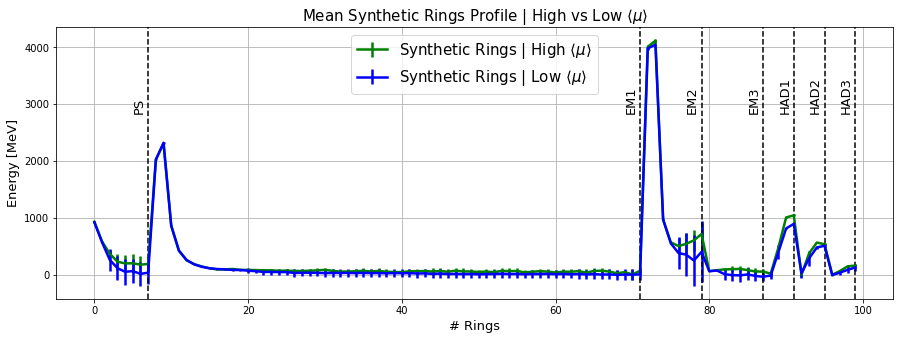

In [15]:
plot_mean_profile(low_gen_df, df2=high_gen_df)

4115.426


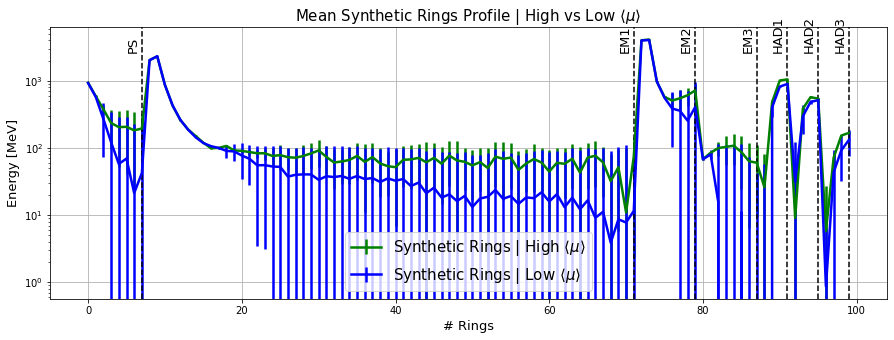

In [16]:
plot_mean_profile(low_gen_df, df2=high_gen_df, dolog=True)

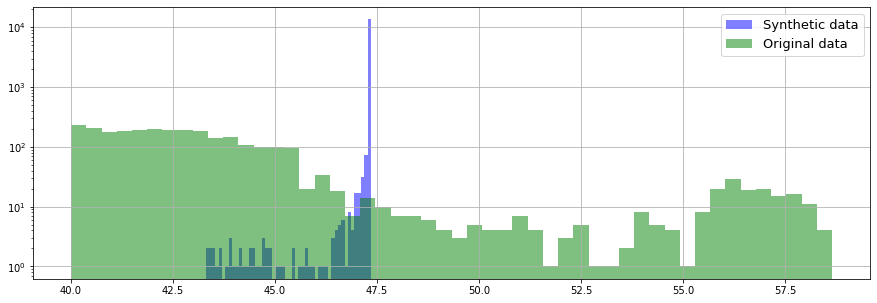

In [17]:
plt.figure(figsize=(15, 5))
m_bins = 50
plt.hist(high_gen_df.avgmu, bins=m_bins, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(high_mu_data.avgmu, bins=m_bins, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

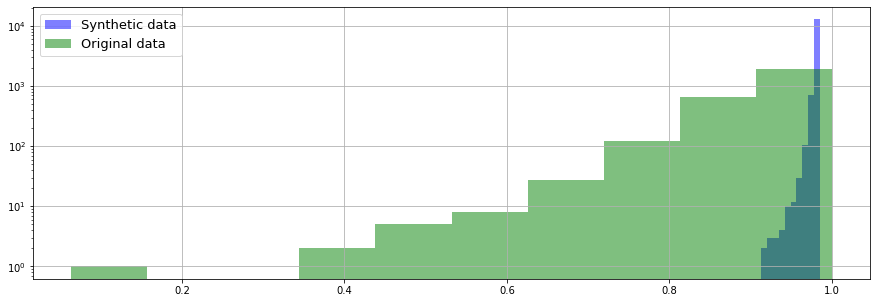

In [18]:
plt.figure(figsize=(15, 5))
plt.hist(high_gen_df.eratio, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(high_mu_data.eratio, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')